In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df = pd.read_csv('/Users/biswasvempati/Desktop/Learn Data Science/9-EDA on Titanic dataset/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Find Null Values

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

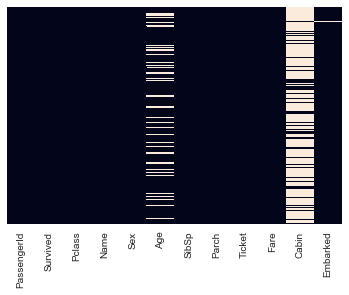

In [101]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

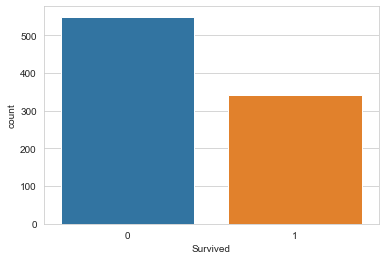

In [102]:
sns.countplot(x='Survived',data=df)
sns.set_style('whitegrid')

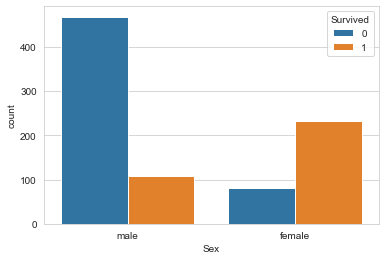

In [103]:
sns.countplot(x='Sex',data=df,hue='Survived')
sns.set_style('whitegrid')

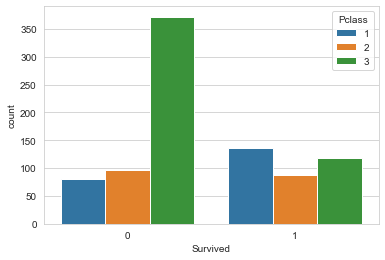

In [104]:
sns.countplot(x='Survived',data=df,hue='Pclass')
sns.set_style('whitegrid')

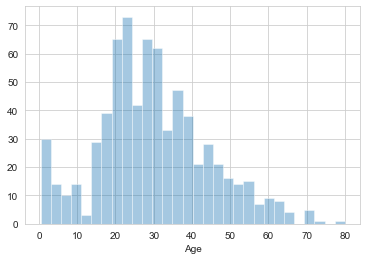

In [105]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

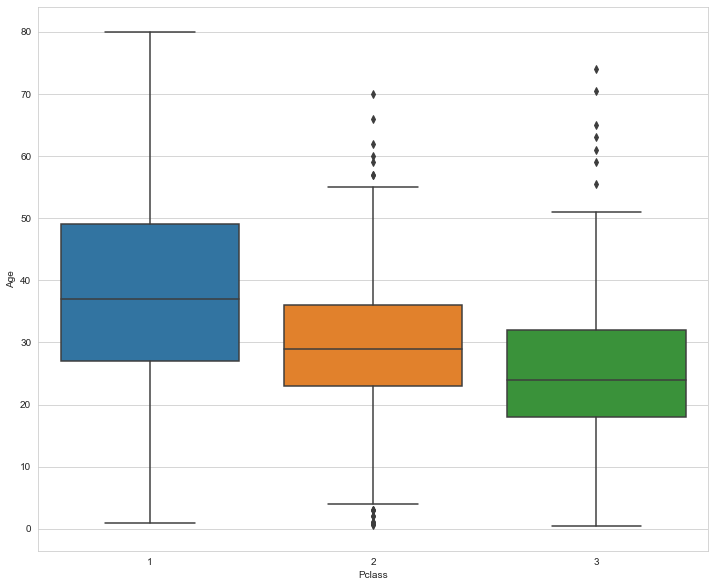

In [106]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass',y='Age',data=df)


In [107]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [108]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

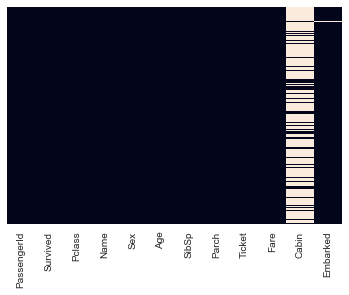

In [109]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [110]:
df.drop('Cabin',axis=1,inplace=True)

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


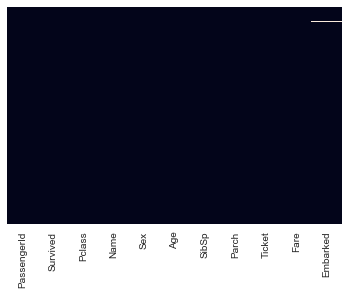

In [112]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [113]:
df['Embarked'].isnull().sum()

2

In [114]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [130]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [131]:
df['Embarked'].isnull().sum()

0

In [132]:
df['Embarked'].isnull().sum()

0

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [137]:
pd.get_dummies(df['Sex'],drop_first=True).head(5)


,male
0,1
1,0
2,0
3,0
4,1


In [135]:
pd.get_dummies(df['Embarked'],drop_first=True).head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [139]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [140]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [141]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [142]:
df=pd.concat([df,sex,embarked],axis=1)

In [146]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [147]:
df.to_csv('Clean_Titanic_Data.csv ')

## Now we completed EDA

The data is ready for our Machine Leaning Model